In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_engine = pd.read_csv('engine_data.csv')

In [3]:
df_engine.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [4]:
df_engine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [5]:
df_engine['Engine Condition'] = df_engine['Engine Condition'].astype('category')

In [6]:
df_engine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Engine rpm        19535 non-null  int64   
 1   Lub oil pressure  19535 non-null  float64 
 2   Fuel pressure     19535 non-null  float64 
 3   Coolant pressure  19535 non-null  float64 
 4   lub oil temp      19535 non-null  float64 
 5   Coolant temp      19535 non-null  float64 
 6   Engine Condition  19535 non-null  category
dtypes: category(1), float64(5), int64(1)
memory usage: 935.0 KB


In [7]:
df_engine.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912


## Exploratory Data Analysis

### Univariate Analysis

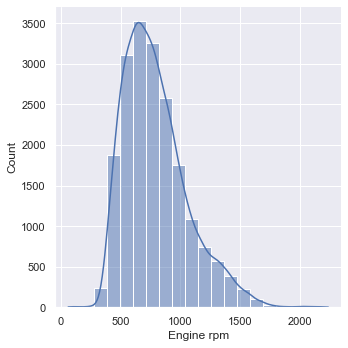

In [8]:
sns.displot(data=df_engine['Engine rpm'], bins= 20, kde= True)
plt.show()

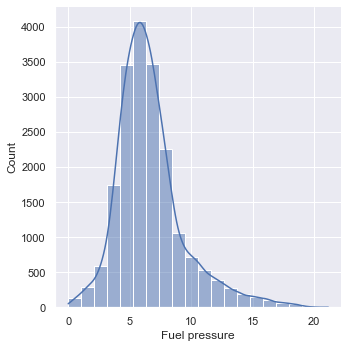

In [9]:
sns.displot(data=df_engine['Fuel pressure'], bins= 20, kde= True)
plt.show()

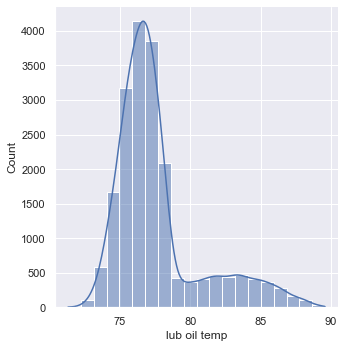

In [10]:
sns.displot(data=df_engine['lub oil temp'], bins= 20, kde= True)
plt.show()

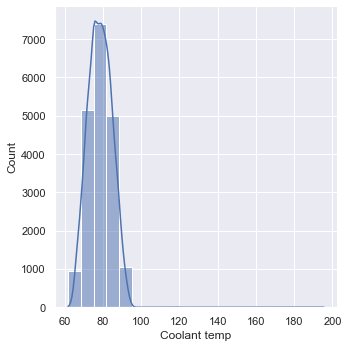

In [11]:
sns.displot(data=df_engine['Coolant temp'], bins= 20, kde= True)
plt.show()

### Bivariate Analysis

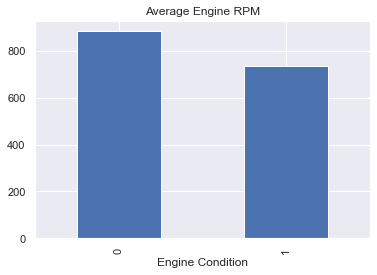

In [13]:
df_engine.groupby('Engine Condition')['Engine rpm'].mean().plot(kind='bar')
plt.title('Average Engine RPM')
plt.show()

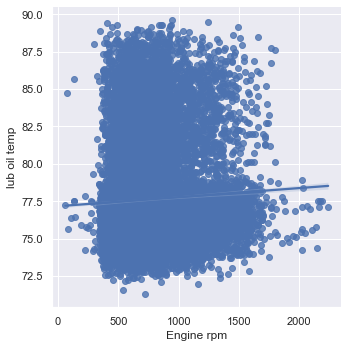

In [15]:
ax = sns.lmplot(x = 'Engine rpm', y = 'lub oil temp', data=df_engine, palette='Set3')

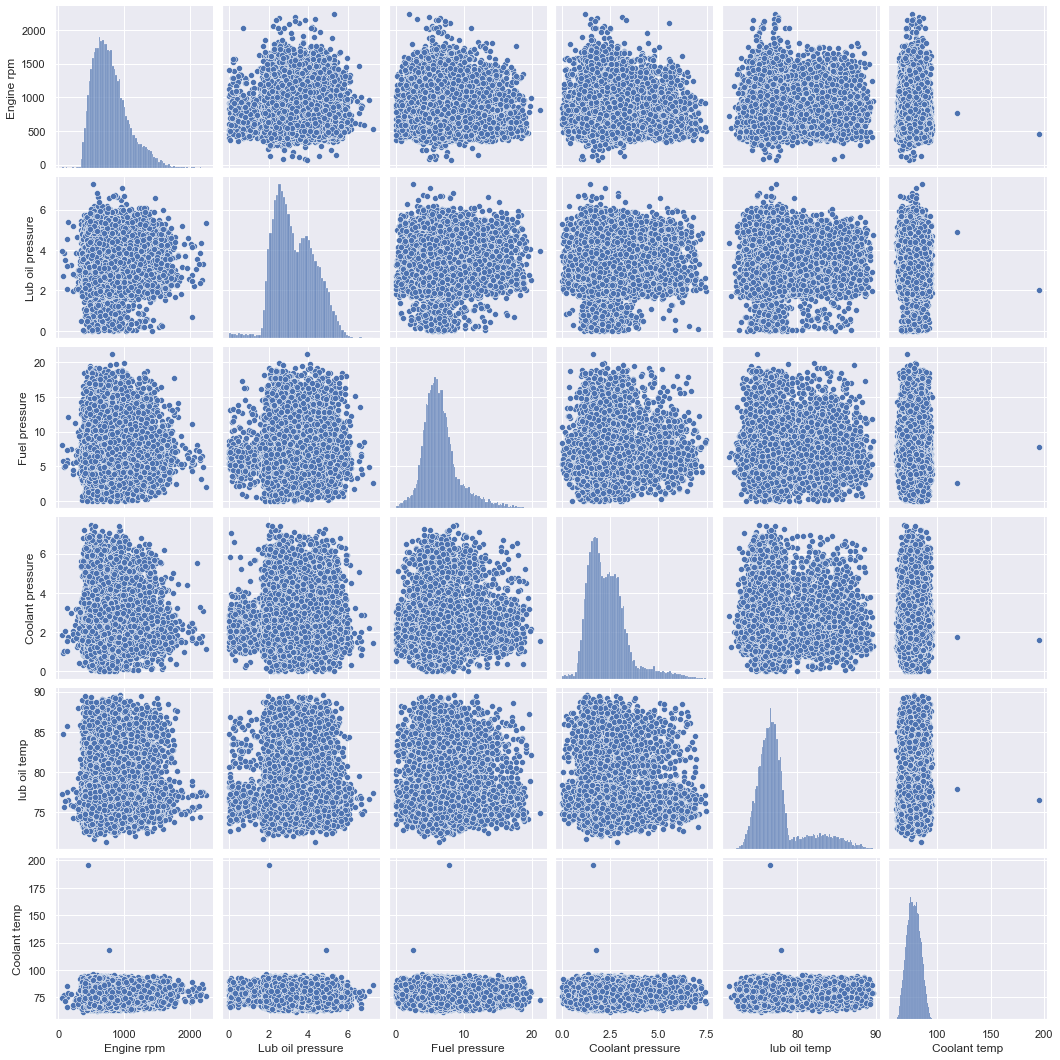

In [16]:
sns.pairplot(df_engine)

<AxesSubplot:>

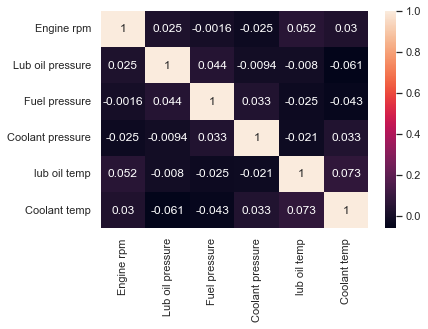

In [18]:
sns.heatmap(df_engine.corr(), annot=True)

## Feature Engineering

In [19]:
df_engine.isnull().sum()

Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

<AxesSubplot:xlabel='Coolant temp'>

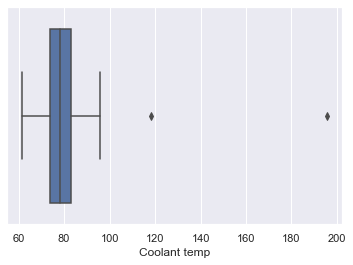

In [20]:
sns.boxplot(df_engine['Coolant temp'])

<AxesSubplot:xlabel='lub oil temp'>

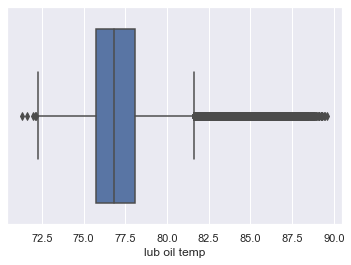

In [21]:
sns.boxplot(df_engine['lub oil temp'])

In [22]:
df_final=df_engine.copy()

## Outlier Treatment

In [24]:

for i in ['Engine rpm', 'Lub oil pressure','Fuel pressure', 'Coolant pressure','lub oil temp']:
    percentile10 = df_engine[i].quantile(0.10)
    percentile90 = df_engine[i].quantile(0.90)

    iqr = percentile90 - percentile10
    
    upper_limit = percentile90 + 1.5 * iqr
    lower_limit = percentile10 - 1.5 * iqr
    oulier_count=len(df_engine[df_engine[i]>upper_limit])+len(df_engine[df_engine[i]<lower_limit])
    print("The no. of outliers in", i, 'is', oulier_count)
    df_final[i] = np.where(
    df_engine[i] > upper_limit, upper_limit, np.where( df_engine[i] < lower_limit, lower_limit, df_engine[i]))

The no. of outliers in Engine rpm is 2
The no. of outliers in Lub oil pressure is 0
The no. of outliers in Fuel pressure is 2
The no. of outliers in Coolant pressure is 32
The no. of outliers in lub oil temp is 0


In [25]:
upper_limit_cooltemp = df_engine['Coolant temp'].mean() + 3*df_engine['Coolant temp'].std()
lower_limit_cooltemp = df_engine['Coolant temp'].mean() - 3*df_engine['Coolant temp'].std()

In [26]:
df_final['Coolant temp'] = np.where(
    df_engine['Coolant temp']>upper_limit_cooltemp,
    upper_limit_cooltemp,
    np.where(
        df_engine['Coolant temp']<lower_limit_cooltemp,
        lower_limit_cooltemp,
        df_engine['Coolant temp']
    )
)

<AxesSubplot:>

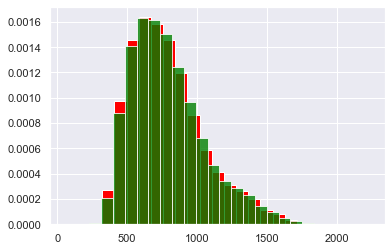

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df_engine['Engine rpm'].hist(bins=25, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
df_final['Engine rpm'].hist(bins=25, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:>

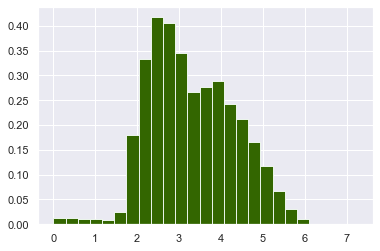

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df_engine['Lub oil pressure'].hist(bins=25, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
df_final['Lub oil pressure'].hist(bins=25, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:>

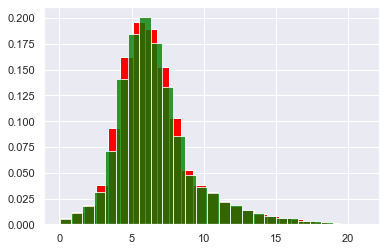

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df_engine['Fuel pressure'].hist(bins=25, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
df_final['Fuel pressure'].hist(bins=25, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:>

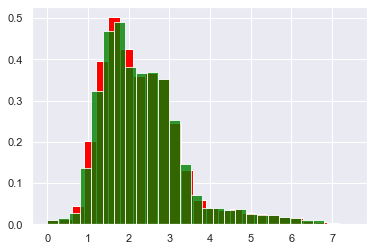

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df_engine['Coolant pressure'].hist(bins=25, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
df_final['Coolant pressure'].hist(bins=25, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:>

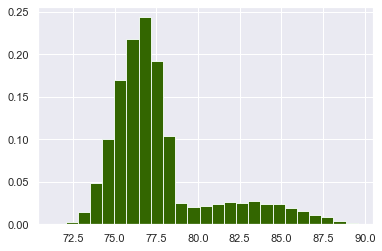

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df_engine['lub oil temp'].hist(bins=25, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
df_final['lub oil temp'].hist(bins=25, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:>

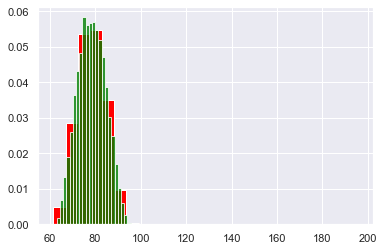

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df_engine['Coolant temp'].hist(bins=25, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
df_final['Coolant temp'].hist(bins=25, ax=ax, color='green', density=True, alpha=0.8)

In [33]:
X = df_engine.drop(['Engine Condition'], axis=1)
Y = df_engine['Engine Condition']

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 42, test_size = 0.25)
x_train.shape, x_test.shape

((14651, 6), (4884, 6))

In [35]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

In [36]:
x_train_scaled[0:5]

array([[-0.22636766, -2.74406197,  0.2124177 ,  0.23707833, -0.46205591,
        -1.14594812],
       [ 1.00377204,  1.42877295, -0.07461879,  0.45320929, -0.96506363,
        -1.04969791],
       [-0.28601079, -0.73006198,  0.06816072, -0.64370929, -0.08742111,
         0.71976972],
       [ 0.35888062, -1.07124545, -0.98593335,  0.43276793,  1.54678358,
         1.63124829],
       [-1.08373775,  0.36309929, -0.92395756, -1.42282349, -0.08313974,
        -0.09692115]])

In [37]:
x_train_scaled=pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [38]:
x_train_scaled.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,-0.226368,-2.744062,0.212418,0.237078,-0.462056,-1.145948
1,1.003772,1.428773,-0.074619,0.453209,-0.965064,-1.049698
2,-0.286011,-0.730062,0.068161,-0.643709,-0.087421,0.719770
3,0.358881,-1.071245,-0.985933,0.432768,1.546784,1.631248
4,-1.083738,0.363099,-0.923958,-1.422823,-0.083140,-0.096921


In [39]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(x_train_scaled, y_train)

LogisticRegression()

In [40]:
y_pred_LR = LR_model.predict(x_test_scaled)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Acuuracy Score: {}'.format((accuracy_score(y_test, y_pred_LR) * 100)))

Acuuracy Score: 64.96723996723996


In [42]:
from sklearn.ensemble import RandomForestClassifier 
RFC_model = RandomForestClassifier()
RFC_model.fit(x_train_scaled, y_train)
y_pred_RFC = RFC_model.predict(x_test_scaled)

from sklearn import metrics

print('Acuuracy Score: {}'.format((accuracy_score(y_test, y_pred_RFC) * 100)))

Acuuracy Score: 64.66011466011466


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_estimators': [15,20,50,80,100,150,200],  
              'max_depth': [2,4,6,8,10], 
              'min_samples_split':[2,4,6],
              'criterion':['gini', 'entropy']}  
   
grid = GridSearchCV(RFC_model, param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(x_train_scaled, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(x_test_scaled) 


In [ ]:
print('Acuuracy Score: {}'.format((accuracy_score(y_test, grid_predictions) * 100)))

In [43]:
RFC2_model = RandomForestClassifier(criterion= 'entropy', max_depth= 8, min_samples_split= 2, n_estimators= 150)
RFC2_model.fit(x_train_scaled, y_train)
y_pred_RFC2 = RFC2_model.predict(x_test_scaled)

from sklearn import metrics

print('Acuuracy Score: {}'.format((accuracy_score(y_test, y_pred_RFC2) * 100)))

Acuuracy Score: 66.05241605241605
